# Exponentially Weighted Moving Average

Mit EWMA wird ein gleitender Durchschnitt berechnet, bei dem neueren Datenpunkten mehr Gewicht zugewiesen wird. So reagiert das Modell schneller auf Änderungen, insbesondere auf schleichende Fehler.

Der Parameter alpha (Gewichtungsfaktor) steuert, wie viel Gewicht neueren Datenpunkten zugewiesen wird. Höhere Werte (z. B. 0.7) geben den letzten Werten mehr Gewicht.
Hierbei wird ein exponentiell gleitender Durchschnitt über die Prozesszeiten berechnet. Wenn die EWMA-Linie den Schwellenwert überschreitet, liegt eine Anomalie vor.
Der Plot zeigt, wie sich die Werte über die Zeit verändern und wann eine potenzielle Anomalie erkannt wird.


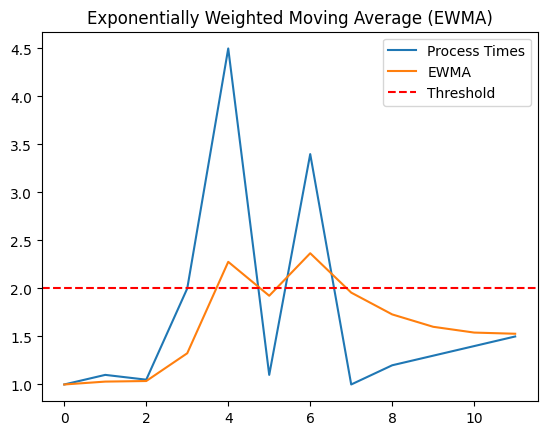

Anomalies detected at indices: [4 6]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Beispieldaten (ersetze das mit deinem echten Datensatz)
process_times = np.array([1, 1.1, 1.05, 2, 4.5, 1.1, 3.4, 1, 1.2, 1.3, 1.4, 1.5])

# Parameter
alpha = 0.3  # Gewichtungsfaktor, Werte zwischen 0 und 1 (0.3 ist ein typischer Wert)

# Berechne EWMA
ewma_values = pd.Series(process_times).ewm(alpha=alpha, adjust=False).mean()

# Schwellwert als Vergleich
threshold = 2.0  # Beispielschwellenwert

# Plot
plt.plot(process_times, label="Process Times")
plt.plot(ewma_values, label="EWMA")
plt.axhline(y=threshold, color='r', linestyle='--', label="Threshold")
plt.legend()
plt.title("Exponentially Weighted Moving Average (EWMA)")
plt.show()

# Identifikation von Fehlern
anomalies = ewma_values > threshold
print("Anomalies detected at indices:", np.where(anomalies)[0])


# CUSUM (Cumulative Sum Control Chart)

CUSUM ist besonders geeignet, um kleine, aber beständige Abweichungen zu erkennen. Hier wird die kumulierte Abweichung vom Durchschnitt berechnet.

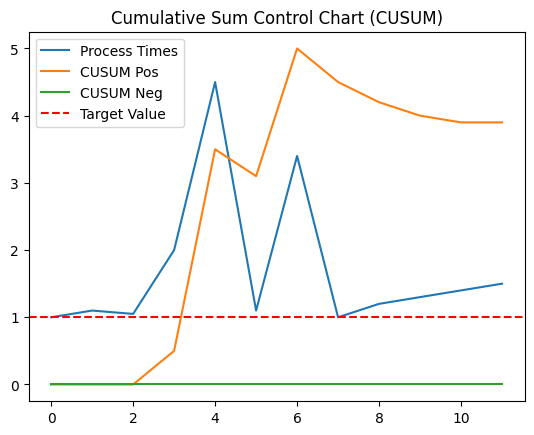

CUSUM Anomalies detected at indices: [ 4  5  6  7  8  9 10 11]


In [7]:
# Parameter für CUSUM
target = 1.0  # Zielwert oder Normalwert des Prozess
k = 0.5  # kleiner "Drift"-Wert zur Sensitivität
h = 2.0  # Schwellwert für Alarmauslösung

# Positive und Negative CUSUM-Arrays initialisieren
cusum_pos = np.zeros(len(process_times))
cusum_neg = np.zeros(len(process_times))

# CUSUM Berechnung
for i in range(1, len(process_times)):
    cusum_pos[i] = max(0, cusum_pos[i-1] + (process_times[i] - target - k))
    cusum_neg[i] = min(0, cusum_neg[i-1] + (process_times[i] - target + k))
    

# Plot
plt.plot(process_times, label="Process Times")
plt.plot(cusum_pos, label="CUSUM Pos")
plt.plot(cusum_neg, label="CUSUM Neg")
plt.axhline(y=target, color='r', linestyle='--', label="Target Value")
plt.legend()
plt.title("Cumulative Sum Control Chart (CUSUM)")
plt.show()

# Identifikation von Fehlern
cusum_anomalies = np.where((cusum_pos > h) | (cusum_neg < -h))[0]
print("CUSUM Anomalies detected at indices:", cusum_anomalies)


# Adaptive Thresholds basierend auf gleitenden Quantilen

In [4]:
window_size = 10  # Anzahl der letzten Werte im gleitenden Fenster
quantile_threshold = 0.9  # 90. Perzentil

# Berechnung des gleitenden Quantils
rolling_quantile = pd.Series(process_times).rolling(window=window_size).quantile(quantile_threshold)

# Identifikation von Fehlern
adaptive_anomalies = process_times > rolling_quantile
print("Adaptive Threshold Anomalies detected at indices:", np.where(adaptive_anomalies)[0])


Adaptive Threshold Anomalies detected at indices: []


# Drift Detection Method

DDM erkennt Drift, indem es Änderungen in der Verteilung überwacht. Hier sind nur Grundelemente dargestellt, da eine vollständige Implementierung komplexer ist.

(Vereinfacht)

In [5]:
# Simplifizierte DDM
window_size = 10
ddm_mean = pd.Series(process_times).rolling(window=window_size).mean()
ddm_std = pd.Series(process_times).rolling(window=window_size).std()

# Fehlerzustand, wenn Mittelwert plus Standardabweichung einen Schwellwert überschreitet
ddm_anomalies = (process_times > (ddm_mean + ddm_std))
print("DDM Anomalies detected at indices:", np.where(ddm_anomalies)[0])


DDM Anomalies detected at indices: []


# Vergleich mit Golden Batch

Hier wird ein Profil der „idealen“ Zeiten gespeichert, und wir vergleichen die aktuellen Daten mit diesem Profil.

In [6]:
# Beispiel Golden Batch Durchschnitt (historische Daten als Vergleich)
golden_batch = np.array([1.0, 1.05, 1.1])  # Beispielwerte

# Vergleich mit Golden Batch
golden_diff = np.abs(process_times - golden_batch.mean())
golden_threshold = 1.0  # Toleranzschwelle

# Identifikation von Fehlern
golden_anomalies = golden_diff > golden_threshold
print("Golden Batch Anomalies detected at indices:", np.where(golden_anomalies)[0])


Golden Batch Anomalies detected at indices: [4 6]


# Automated Time Series Anomaly Detection (Prophet)

